# Análisis Exploratorio

TODO
- [x] Comience describiendo cuantas variables y observaciones tiene disponibles, el tipo de cada una de las variables.
- [x] Haga un resumen de las variables numéricas e investigue si siguen una distribución normal y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando.
- [ ] Encoding de las variables categóricas.
- [x] Arreglar estado_pil
- [ ] Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado.
- [ ] Haga gráficos exploratorios que le de ideas del estado de los datos.
- [ ] Haga un agrupamiento (clustering) e interprete los resultados. 

In [1030]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set seeds for reproducibility
np.random.seed(2024)
seed = 2024

In [1031]:
# Load the data
df_2011 = pd.read_csv('data/2011.csv')
df_2013 = pd.read_csv('data/2013.csv')
df_2014 = pd.read_csv('data/2014.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')
df_2020 = pd.read_csv('data/2020.csv')
df_2022 = pd.read_csv('data/2022.csv')

In [1032]:
# Concatenate the data with only the columns that are present in the df_2011
df = pd.concat([
    df_2011,
    df_2013,
    df_2014,
    df_2016,
    df_2017,
    df_2018,
    df_2019,
    df_2020,
    df_2022
], axis=0, ignore_index=True)

In [1033]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,zona_ocu,sexo_pil,edad_pil,mayor_menor,estado_pil,tipo_vehi,marca_vehi,causa_acc,year
0,27,Junio,Lunes,17,Guatemala,10,Hombre,42,Mayor,Normal,Automovil,Audi,Colisión,2011
1,18,Septiembre,Domingo,0,Guatemala,7,Hombre,25,Mayor,Ebrio,Automovil,Audi,Empotro,2011
2,5,Octubre,Miercoles,19,Quetzaltenango,Ignorado,Hombre,26,Mayor,Ebrio,Automovil,Audi,Colisión,2011
3,15,Febrero,Martes,12,Izabal,Ignorado,Hombre,59,Mayor,Ignorado,Camioneta,Land rover,Colisión,2011
4,17,Junio,Viernes,18,Guatemala,11,Mujer,25,Mayor,Normal,Camioneta,Land rover,Colisión,2011


In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76792 entries, 0 to 76791
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dia_ocu      76792 non-null  int64 
 1   mes_ocu      76792 non-null  object
 2   dia_sem_ocu  76792 non-null  object
 3   hora_ocu     76792 non-null  object
 4   depto_ocu    76792 non-null  object
 5   zona_ocu     76792 non-null  object
 6   sexo_pil     76792 non-null  object
 7   edad_pil     76792 non-null  object
 8   mayor_menor  76792 non-null  object
 9   estado_pil   76792 non-null  object
 10  tipo_vehi    76792 non-null  object
 11  marca_vehi   76792 non-null  object
 12  causa_acc    76792 non-null  object
 13  year         76792 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 8.2+ MB


In [1035]:
# Separate numerical and categorical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns

In [1036]:
# Numerical NA's
df[numerical].isna().sum()

dia_ocu    0
year       0
dtype: int64

Dada la naturaleza con la que la información fue recolectada, los datos no son consistentes en cuanto a sus mayúsculas y minúsculas. Tampoco se tienen valores nulos, si no que aparecen como "ignorado", por lo que es necesario su tratamiento.

In [1037]:
# To lower Case
df[categorical] = df[categorical].apply(lambda x: x.str.lower())

## Corrección de variables

In [1038]:
# Categorical variables
for col in categorical:
    # Print them sorted
    print(df[col].value_counts().sort_index())

mes_ocu
abril         6583
agosto        6484
diciembre     6612
enero         6646
febrero       6603
julio         6330
junio         6206
marzo         7090
mayo          6466
noviembre     5841
octubre       5500
septiembre    5767
septiemre      664
Name: count, dtype: int64
dia_sem_ocu
domingo      13992
jueves        9648
lunes        10108
martes        8836
miercoles     3629
miércoles     5309
sabado        5557
sábado        8780
viernes      10933
Name: count, dtype: int64
hora_ocu
0           1098
1            714
10           662
11           774
12           719
13           759
14           863
15           997
16           912
17          1189
18          1261
19          1463
2            527
20          1437
21          1414
22          1254
23          1115
3            408
4            291
5            414
6            543
7            702
8            645
9            608
ignorada      15
Name: count, dtype: int64
depto_ocu
alta verapaz       2933
alta verpaz     

Muchos datos están inconsistentes por culpa de las tíldes, por lo que se procede a corregirlos.

In [1039]:
accented_vowels = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U'
}

df.replace(accented_vowels, regex=True, inplace=True)

# Replace all 'ignorada' and 'ignorado' with 'NA' in the categorical columns
df[categorical] = df[categorical].replace(['ignorada', 'ignorado'], np.nan)

También algunos están mal escritos

In [1040]:
df['depto_ocu'] = df['depto_ocu'].replace('alta verpaz', 'alta verapaz')
df['mes_ocu'] = df['mes_ocu'].replace('septiemre', 'septiembre')
df['causa_acc'] = df['causa_acc'].replace('volco', 'vuelco')
df['tipo_vehi'] = df['tipo_vehi'].replace('moto taxi', 'mototaxi')
# df['causa_acc'] = df['causa_acc'].replace('choque', 'colision')

Existen algunos valores en _estado\_pil_ con valor numérico. En base al diccionario de variables proveído por el INE, son cambiados

In [1041]:
df['estado_pil'] = df['estado_pil'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'], 'ebrio')
df['estado_pil'] = df['estado_pil'].replace(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], 'no ebrio')
df['estado_pil'] = df['estado_pil'].replace('normal', 'no ebrio')

In [1042]:
# Categorical variables
for col in categorical:
    # Print them sorted
    print(df[col].value_counts().sort_index())

mes_ocu
abril         6583
agosto        6484
diciembre     6612
enero         6646
febrero       6603
julio         6330
junio         6206
marzo         7090
mayo          6466
noviembre     5841
octubre       5500
septiembre    6431
Name: count, dtype: int64
dia_sem_ocu
domingo      13992
jueves        9648
lunes        10108
martes        8836
miercoles     8938
sabado       14337
viernes      10933
Name: count, dtype: int64
hora_ocu
0     1098
1      714
10     662
11     774
12     719
13     759
14     863
15     997
16     912
17    1189
18    1261
19    1463
2      527
20    1437
21    1414
22    1254
23    1115
3      408
4      291
5      414
6      543
7      702
8      645
9      608
Name: count, dtype: int64
depto_ocu
alta verapaz       3006
baja verapaz       1328
chimaltenango      2866
chiquimula         1652
el progreso        1780
escuintla          6055
guatemala         30020
huehuetenango      1546
izabal             2689
jalapa             1136
jutiapa           

Arreglando los valores nulos, se convierten en columnas numéricas

In [1043]:
import numpy as np

df['hora_ocu'] = df['hora_ocu'].replace('NA', np.nan).astype(float)
df['zona_ocu'] = df['zona_ocu'].replace('NA', np.nan).astype(float)
df['edad_pil'] = df['edad_pil'].replace('NA', np.nan).astype(float)

categorical = categorical.drop(['hora_ocu', 'zona_ocu', 'edad_pil'])
numerical = numerical.append(pd.Index(['hora_ocu', 'zona_ocu', 'edad_pil']))

## Análisis de variables

### Ajuste de valores nulos

In [1044]:
df[categorical].isnull().sum()

mes_ocu            0
dia_sem_ocu        0
depto_ocu          0
sexo_pil        9603
mayor_menor    12572
estado_pil     45844
tipo_vehi       4247
marca_vehi     21676
causa_acc         27
dtype: int64

In [1045]:
df[numerical].isnull().sum()

dia_ocu         0
year            0
hora_ocu    56023
zona_ocu    56425
edad_pil    16871
dtype: int64

#### Categóricas
- _mayor\_menor_: Si la edad es menor a 18 años, se considerará menor, de lo contrario, mayor.
- _sexo\_pil_: los valores nulos serán seleccionados aleatoriamente.
- _estado\_pil_: los valores no especificados se representarán en una nueva categoría.
- _marca\_vehi_: los valores nulos se representarán en una nueva categoría.
- _tipo\_vehi_: los valores nulos serán seleccionados aleatoriamente.
- _causa\_acc_: se eliminará esas observaciones al no ser una cantidad de datos relevantes.

#### Numéricas
- _hora\_ocu_: los valores nulos serán reemplazados por la moda y será representado por una nueva columna.
- _zona\_ocu_: esta característica no es relevante para el análisis y contiene una cantidad significativa de datos nulos; por lo que se eliminará.
- _edad\_pil_: los valores nulos serán reemplazados por la mediana y será representado por una nueva columna.

In [1046]:
# Categorical variables
df['mayor_menor'] = np.where(df['edad_pil'] < 18, 'menor', 'mayor')

df['sexo_pil'] = df['sexo_pil'].fillna(
    df['sexo_pil'].sample(frac=1, random_state=seed).iloc[0]
)

df['estado_pil'] = df['estado_pil'].fillna('no especificado')

df['marca_vehi'] = df['marca_vehi'].fillna('no especificado')

df['tipo_vehi'] = df['tipo_vehi'].fillna(
    df['tipo_vehi'].sample(frac=1, random_state=seed).iloc[0]
)

df = df.dropna(subset=['causa_acc'])

# Numerical variables
df = df.drop(columns=['zona_ocu'])
numerical = numerical.drop('zona_ocu')

df['hora_ocu_missing'] = df['hora_ocu'].isna().astype(str)
categorical = categorical.append(pd.Index(['hora_ocu_missing']))
df['hora_ocu'] = df['hora_ocu'].fillna(df['hora_ocu'].mode()[0])

df['edad_pil_missing'] = df['edad_pil'].isna().astype(str)
categorical = categorical.append(pd.Index(['edad_pil_missing']))
df['edad_pil'] = df['edad_pil'].fillna(df['edad_pil'].median())

### Distribución de las variables
#### Categóricas

In [1047]:
# for col in categorical:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=df, y=col, order=df[col].value_counts().index)
#     plt.title(f'Distribución de {col}')
#     plt.show()
#     print(df[col].value_counts(normalize=True).sort_values(ascending=False))

#### Numéricas

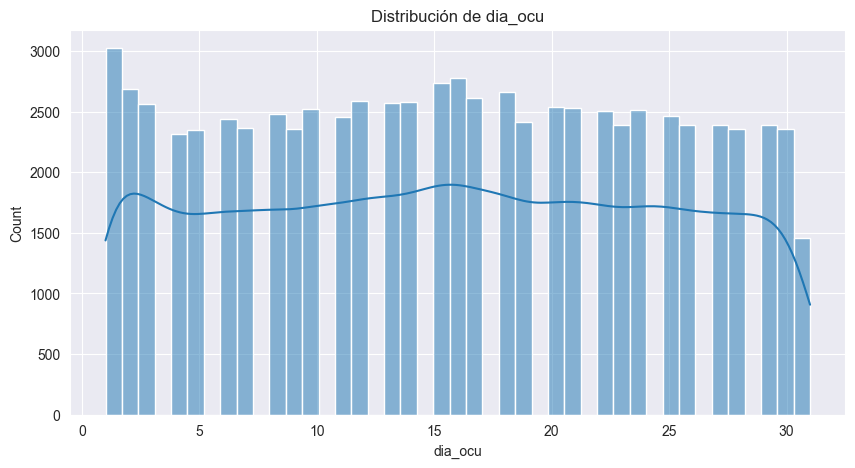

count    76765.000000
mean        15.623162
std          8.806435
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: dia_ocu, dtype: float64


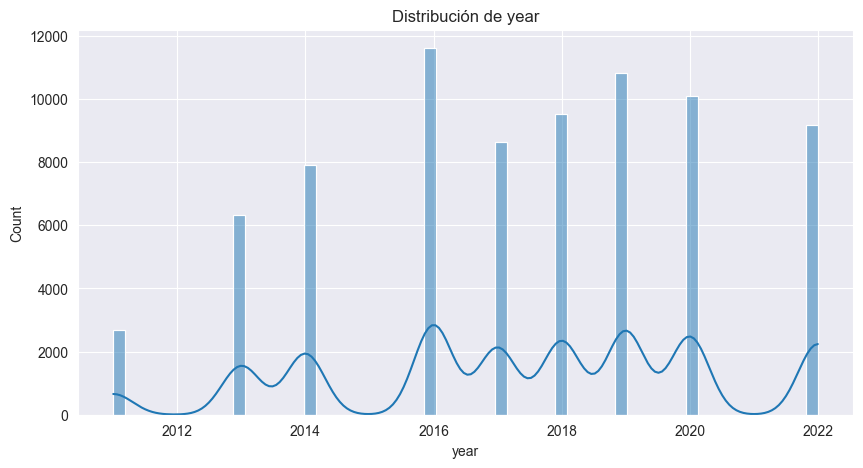

count    76765.000000
mean      2017.398411
std          2.890289
min       2011.000000
25%       2016.000000
50%       2018.000000
75%       2020.000000
max       2022.000000
Name: year, dtype: float64


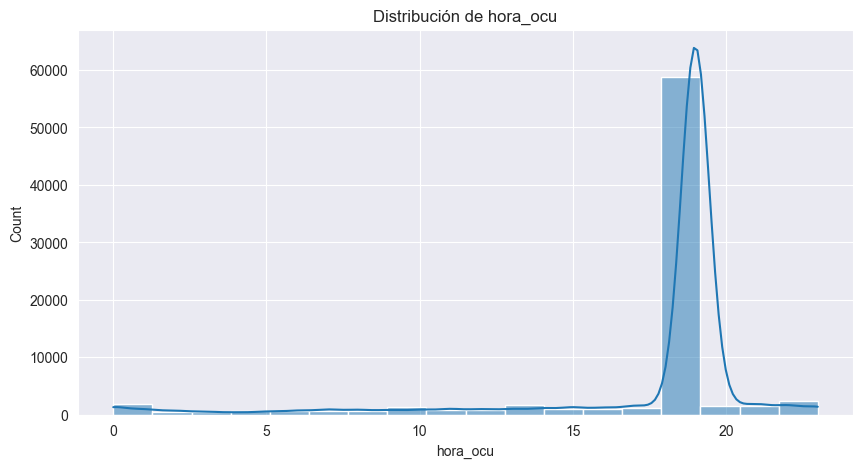

count    76765.000000
mean        17.542448
std          4.350162
min          0.000000
25%         19.000000
50%         19.000000
75%         19.000000
max         23.000000
Name: hora_ocu, dtype: float64


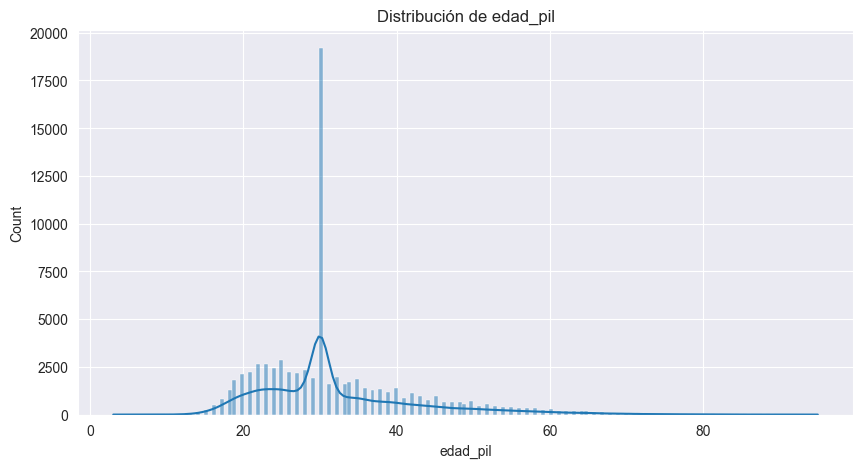

count    76765.000000
mean        32.273067
std         10.743334
min          3.000000
25%         25.000000
50%         30.000000
75%         36.000000
max         95.000000
Name: edad_pil, dtype: float64


In [1048]:
for col in numerical:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()
    print(df[col].describe())

### Cruce de variables

In [1049]:
# Categorical variables
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, hue='sexo_pil', order=df[col].value_counts().index)
    plt.title(f'Distribución de {col} por sexo')
    plt.show()
    print(df.groupby(col)['sexo_pil'].value_counts(normalize=True).sort_index())

In [1050]:
# Categorical variables
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, hue='mayor_menor', order=df[col].value_counts().index)
    plt.title(f'Distribución de {col} por edad')
    plt.show()
    print(df.groupby(col)['mayor_menor'].value_counts(normalize=True).sort_index())

In [1051]:
for col in categorical:
    # Filter out 'no especificado' rows
    df_filtered = df.loc[df['estado_pil'] != 'no especificado']

    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_filtered, y=col, hue='estado_pil', order=df_filtered[col].value_counts().index)
    plt.title(f'Distribución de {col} por estado del piloto')
    plt.show()
    print(df_filtered.groupby(col)['estado_pil'].value_counts(normalize=True).sort_index())

### Encoding
Las características que utilizarán _ordinal\_encoding_ son: 'mes_ocu', 'dia_sem_ocu', 'depto_ocu', 'tipo_vehi', 'marca_vehi',

In [1052]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,sexo_pil,edad_pil,mayor_menor,estado_pil,tipo_vehi,marca_vehi,causa_acc,year,hora_ocu_missing,edad_pil_missing
0,27,junio,lunes,19.0,guatemala,hombre,42.0,mayor,no ebrio,automovil,audi,colision,2011,True,False
1,18,septiembre,domingo,19.0,guatemala,hombre,25.0,mayor,ebrio,automovil,audi,empotro,2011,True,False
2,5,octubre,miercoles,19.0,quetzaltenango,hombre,26.0,mayor,ebrio,automovil,audi,colision,2011,True,False
3,15,febrero,martes,19.0,izabal,hombre,59.0,mayor,no especificado,camioneta,land rover,colision,2011,True,False
4,17,junio,viernes,19.0,guatemala,mujer,25.0,mayor,no ebrio,camioneta,land rover,colision,2011,True,False


In [1053]:
# Manual mapping to keep the order
mes_ocu_cat = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
mes_ocu_mapping = {month: i+1 for i, month in enumerate(mes_ocu_cat)}
df['mes_ocu'] = df['mes_ocu'].map(mes_ocu_mapping)

dia_sem_ocu_cat = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
dia_sem_ocu_mapping = {day: i+1 for i, day in enumerate(dia_sem_ocu_cat)}
df['dia_sem_ocu'] = df['dia_sem_ocu'].map(dia_sem_ocu_mapping)

In [1054]:
ordinal_encoder = OrdinalEncoder()

In [1055]:
# Ordinal encoding
use_ordinal = [
    'depto_ocu', 
    'tipo_vehi', 
    'marca_vehi'
]
df[use_ordinal] = ordinal_encoder.fit_transform(df[use_ordinal])

In [1056]:
# One hot is the difference of all the categorical columns and the ones that are going to be ordinal encoded
use_onehot = list(set(categorical) - set(use_ordinal) - {'mes_ocu', 'dia_sem_ocu', 'hora_ocu_missing', 'edad_pil_missing'})

# One hot encoding
df = pd.get_dummies(df, columns=use_onehot)

In [1057]:
# If the column type is bool, turn to int
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

In [1058]:
parse_bool_map = {
    'True': 1,
    'False': 0
}
df['hora_ocu_missing'] = df['hora_ocu_missing'].map(parse_bool_map)
df['edad_pil_missing'] = df['edad_pil_missing'].map(parse_bool_map)
df['hora_ocu_missing'] = df['hora_ocu_missing'].astype(int)
df['edad_pil_missing'] = df['edad_pil_missing'].astype(int)

### Correlación

<Axes: >

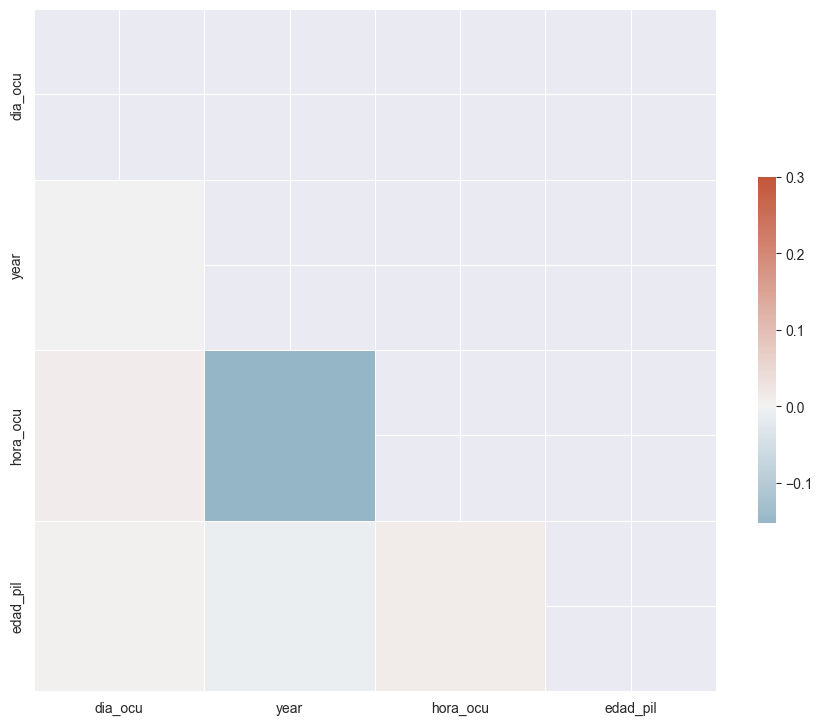

In [1059]:
corr_matrix = df[numerical].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

No hay correlación entre variables numéricas

## Scaling

In [1060]:
scaler = StandardScaler()

In [1061]:
# All the columns that are either int or float
to_scale = df.select_dtypes(include=['int64', 'float64']).columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76765 entries, 0 to 76791
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dia_ocu                     76765 non-null  int64  
 1   mes_ocu                     76765 non-null  int64  
 2   dia_sem_ocu                 76765 non-null  int64  
 3   hora_ocu                    76765 non-null  float64
 4   depto_ocu                   76765 non-null  float64
 5   edad_pil                    76765 non-null  float64
 6   tipo_vehi                   76765 non-null  float64
 7   marca_vehi                  76765 non-null  float64
 8   year                        76765 non-null  int64  
 9   hora_ocu_missing            76765 non-null  int32  
 10  edad_pil_missing            76765 non-null  int32  
 11  estado_pil_ebrio            76765 non-null  int32  
 12  estado_pil_no ebrio         76765 non-null  int32  
 13  estado_pil_no especificado  76765 no

In [1062]:
scaled_df = df.copy()
scaled_df[to_scale] = scaler.fit_transform(scaled_df[to_scale])

In [1063]:
scaled_df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,edad_pil,tipo_vehi,marca_vehi,year,hora_ocu_missing,...,causa_acc_colision,causa_acc_derrape,causa_acc_embarranco,causa_acc_empotro,causa_acc_encuneto,causa_acc_vuelco,sexo_pil_hombre,sexo_pil_mujer,mayor_menor_mayor,mayor_menor_menor
0,1.291886,-0.108749,-1.623113,0.335059,-0.457617,0.905398,-1.563973,-2.057137,-2.213776,1,...,1,0,0,0,0,0,1,0,1,0
1,0.269900,0.758074,1.309048,0.335059,-0.457617,-0.676989,-1.563973,-2.057137,-2.213776,1,...,0,0,0,1,0,0,1,0,1,0
2,-1.206303,1.047015,-0.645726,0.335059,0.679500,-0.583907,-1.563973,-2.057137,-2.213776,1,...,1,0,0,0,0,0,1,0,1,0
3,-0.070763,-1.264512,-1.134420,0.335059,-0.078578,2.487785,-0.518687,-0.185932,-2.213776,1,...,1,0,0,0,0,0,1,0,1,0
4,0.156346,-0.108749,0.331661,0.335059,-0.457617,-0.676989,-0.518687,-0.185932,-2.213776,1,...,1,0,0,0,0,0,0,1,1,0


## Clustering

Buscamos el mejor número de clusters

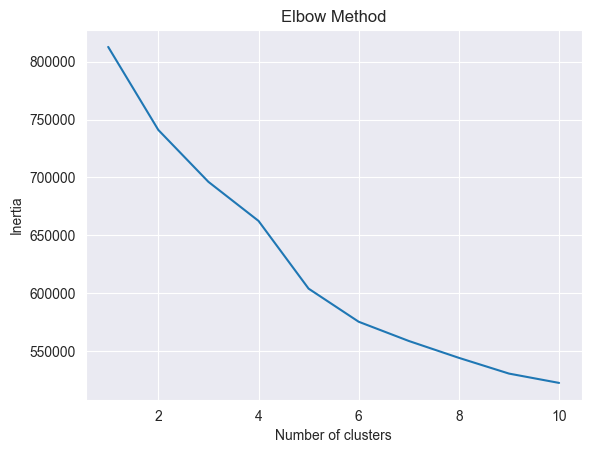

In [1064]:
# Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

El método del codo no es claro, por lo que se procede a utilizar el método de la silueta

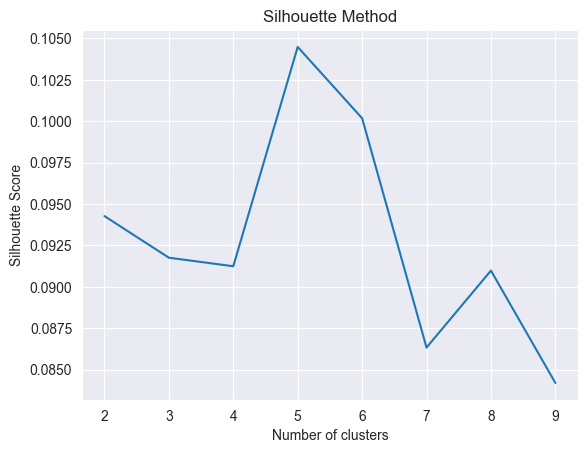

In [1069]:
from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, kmeans.labels_))
    
plt.plot(range(2, 10), silhouette)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Procedemos a utilizar 5 clusters

In [1070]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(scaled_df)

KMeans(n_clusters=5, random_state=2024)

In [1075]:
# Add the cluster to the original dataframe
scaled_df['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [1080]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,edad_pil,tipo_vehi,marca_vehi,year,hora_ocu_missing,...,causa_acc_derrape,causa_acc_embarranco,causa_acc_empotro,causa_acc_encuneto,causa_acc_vuelco,sexo_pil_hombre,sexo_pil_mujer,mayor_menor_mayor,mayor_menor_menor,cluster
0,27,6,1,19.0,6.0,42.0,0.0,4.0,2011,1,...,0,0,0,0,0,1,0,1,0,1
1,18,9,7,19.0,6.0,25.0,0.0,4.0,2011,1,...,0,0,1,0,0,1,0,1,0,1
2,5,10,3,19.0,12.0,26.0,0.0,4.0,2011,1,...,0,0,0,0,0,1,0,1,0,1
3,15,2,2,19.0,8.0,59.0,7.0,90.0,2011,1,...,0,0,0,0,0,1,0,1,0,0
4,17,6,5,19.0,6.0,25.0,7.0,90.0,2011,1,...,0,0,0,0,0,0,1,1,0,1


### Visualización, análisis y calidad de los clusters

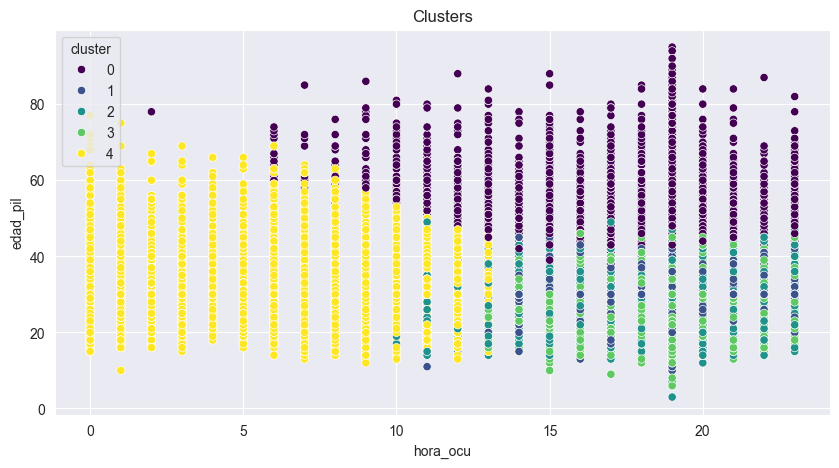

In [1083]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='hora_ocu', y='edad_pil', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.show()